In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.

In [2]:
# Read the Dataset

In [3]:
# Load the dataset into a Pandas DataFrame
data=pd.read_csv('C:\\Users\\user\\Downloads\\titanic_dataset.csv')

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# To check the first five rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# To check how many rows and columns are present in the given dataset
data.shape

(891, 12)

In [7]:
# To check some basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 2.

In [8]:
# Preprocessing Steps

In [9]:
# Drop irrelevance column
data.drop(['PassengerId'],axis=1,inplace=True)

In [10]:
# Handling Missing Values

In [11]:
# To check the missing values in the given dataset
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

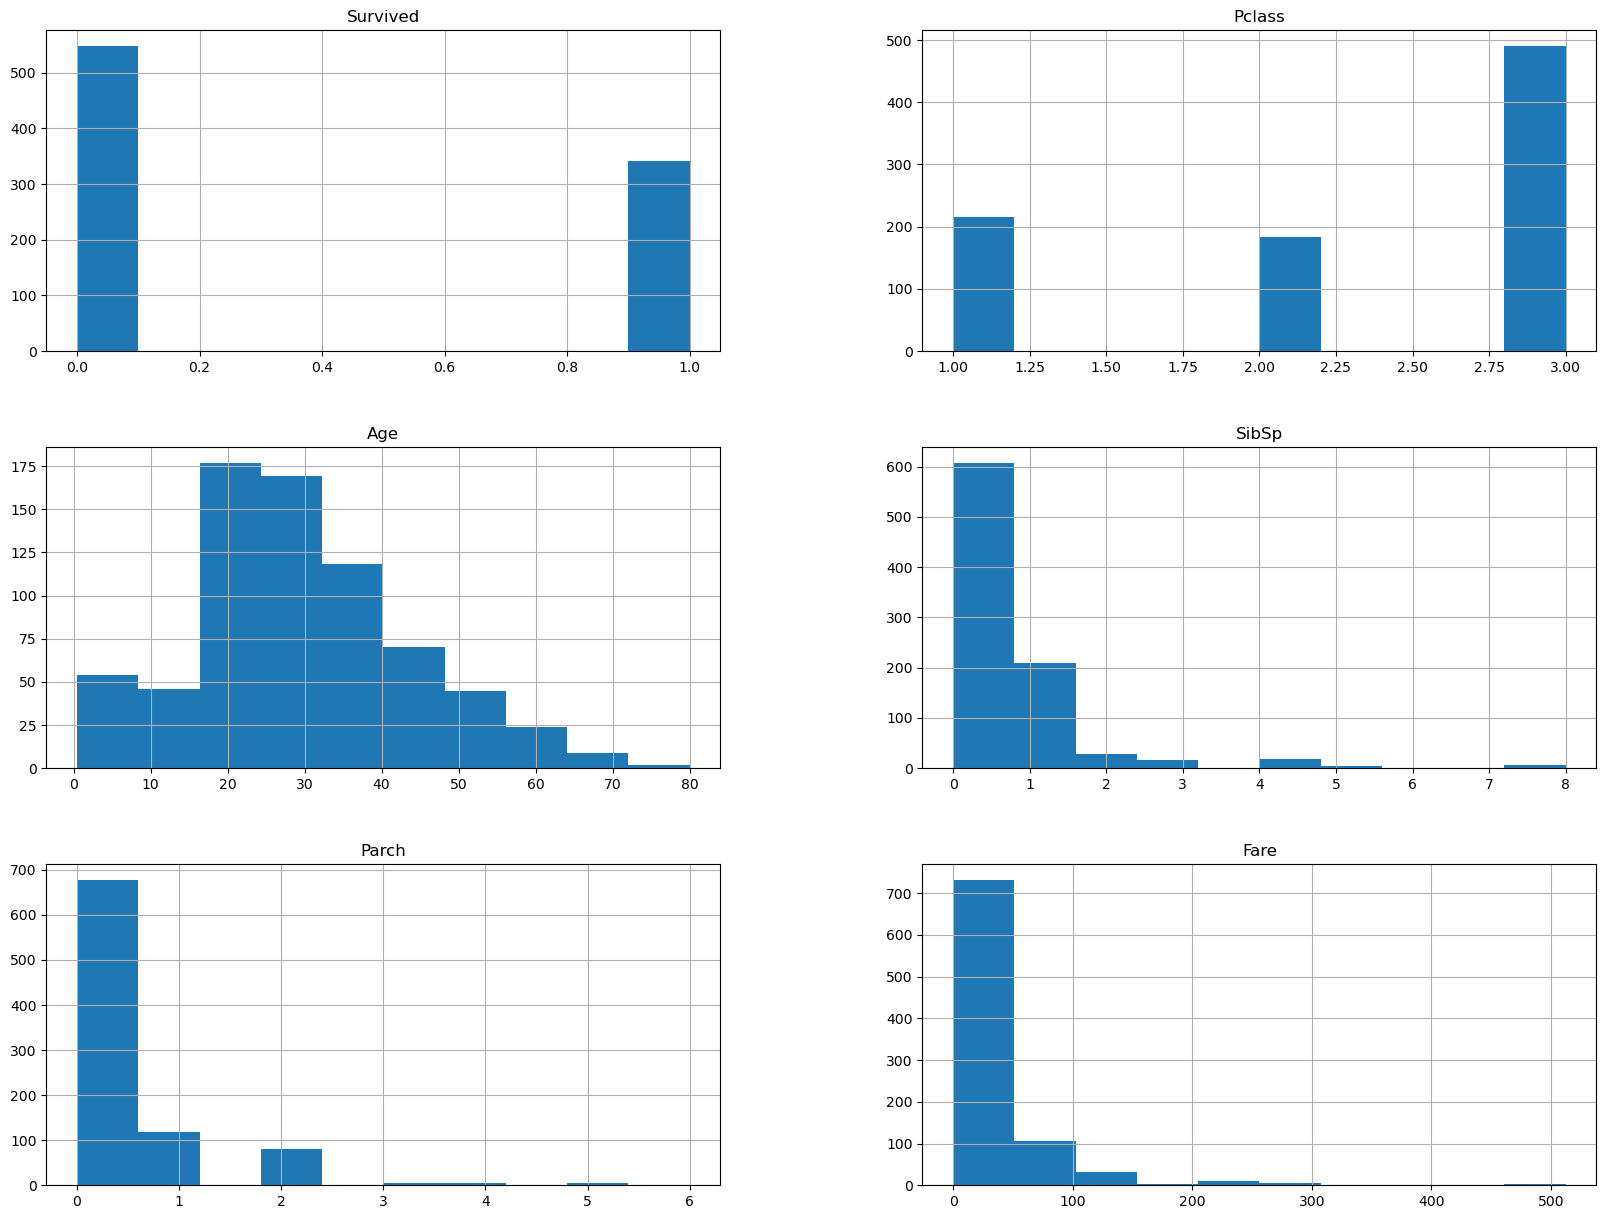

In [12]:
# Plot the frequency graph to show the distribution
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [13]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# Fill missing values using appropriate methods
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Cabin'].fillna(data['Cabin'].mode().values[0], inplace=True)
data['Embarked'].fillna(data['Embarked'].mode().values[0], inplace=True)

In [15]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

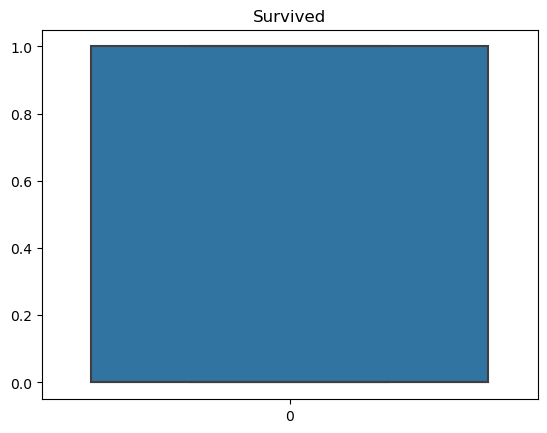

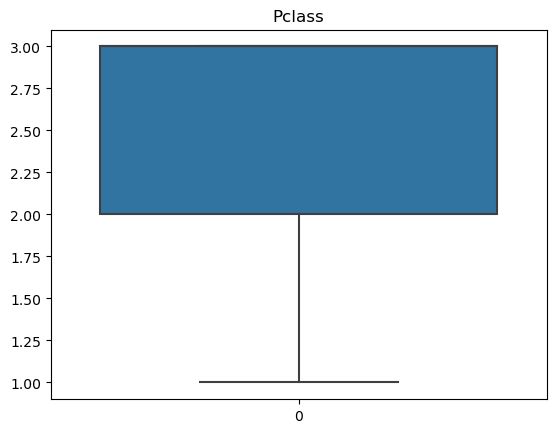

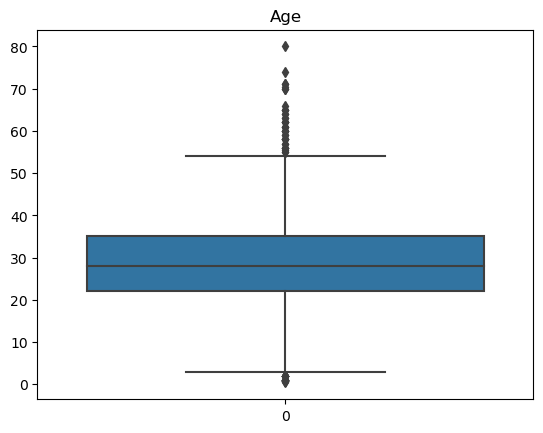

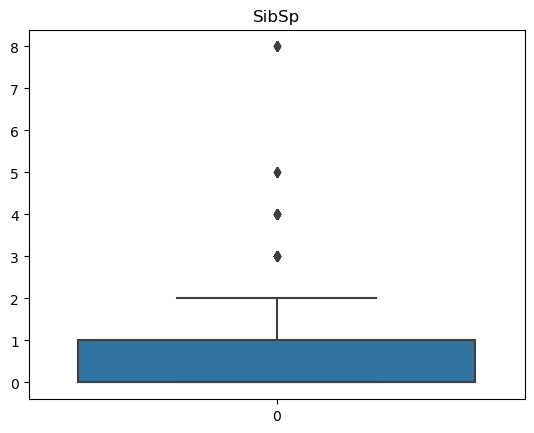

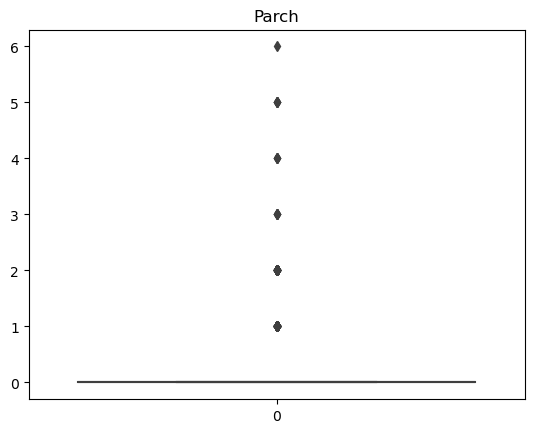

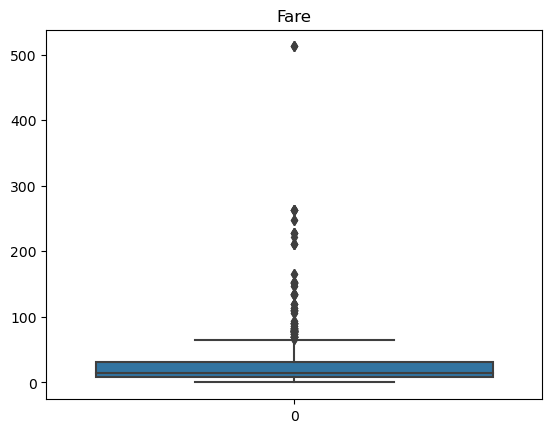

In [16]:
# Plot the Box-plot to identify Outliers
numeric_columns = data.select_dtypes(include=['float', 'int'])
for column in numeric_columns:
    plt.figure()
    sns.boxplot(data[column])
    plt.title(column)
    plt.show()

In [17]:
# Calculate the quartiles
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')

C:\Users\user\AppData\Local\Temp\ipykernel_12412\534762207.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Age'],25,interpolation='midpoint')
C:\Users\user\AppData\Local\Temp\ipykernel_12412\534762207.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Age'],50,interpolation='midpoint')
C:\Users\user\AppData\Local\Temp\ipykernel_12412\534762207.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midp

In [18]:
# Print the quartiles
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [19]:
data['Age'].median()

28.0

In [20]:
# Calculate the IQR
IQR=Q3-Q1
print(IQR)

13.0


In [21]:
# Calculate upper & lower whiskers
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR
# Print the upper & lower whiskers
print(up_lim)
print(low_lim)

54.5
2.5


In [22]:
# Find the outliers
outliers=[]
for x in data['Age']:
    if (x>up_lim) or (x<low_lim):
       outliers.append(x)

In [23]:
# Print the outliers
outliers

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [24]:
# Find the indices of the outliers
ind1=data['Age']>up_lim
data.loc[ind1].index 

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [25]:
ind2=data['Age']<low_lim
data.loc[ind2].index 

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [26]:
# Drop the outliers from the dataset
data.drop([11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879,7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],inplace=True)

In [27]:
# Calculate the quartiles
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

C:\Users\user\AppData\Local\Temp\ipykernel_12412\467490160.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
C:\Users\user\AppData\Local\Temp\ipykernel_12412\467490160.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
C:\Users\user\AppData\Local\Temp\ipykernel_12412\467490160.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or '

In [28]:
# Print the quartiles
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [29]:
data['SibSp'].median()

0.0

In [30]:
# Calculate the IQR
IQR=Q3-Q1
print(IQR)

1.0


In [31]:
# Calculate upper & lower whiskers
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR
# Print the upper & lower whiskers
print(up_lim)
print(low_lim)

2.5
-1.5


In [32]:
# Find the outliers
outliers=[]
for x in data['SibSp']:
    if (x>up_lim) or (x<low_lim):
       outliers.append(x)

In [33]:
# Print the outliers
outliers

[3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8]

In [34]:
# Find the indices of the outliers
ind1=data['SibSp']>up_lim
data.loc[ind1].index 

Int64Index([ 24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863],
           dtype='int64')

In [35]:
# Drop the outliers from the dataset
data.drop([ 24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863],inplace=True)

In [36]:
# Calculate the quartiles
Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
Q3=np.percentile(data['Parch'],75,interpolation='midpoint')

C:\Users\user\AppData\Local\Temp\ipykernel_12412\3725864879.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
C:\Users\user\AppData\Local\Temp\ipykernel_12412\3725864879.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
C:\Users\user\AppData\Local\Temp\ipykernel_12412\3725864879.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', o

In [37]:
# Print the quartiles
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [38]:
data['Parch'].median()

0.0

In [39]:
# Calculate the IQR
IQR=Q3-Q1
print(IQR)

0.0


In [40]:
# Calculate upper & lower whiskers
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR
# Print the upper & lower whiskers
print(up_lim)
print(low_lim)

0.0
0.0


In [41]:
# Find the outliers
outliers=[]
for x in data['Parch']:
    if (x>up_lim) or (x<low_lim):
       outliers.append(x)

In [42]:
# Print the outliers
outliers

[2,
 1,
 5,
 5,
 2,
 2,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 5,
 2,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 6,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 2,
 2,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 5,
 2]

In [43]:
# Find the indices of the outliers
ind1=data['Parch']>up_lim
data.loc[ind1].index 

Int64Index([  8,  10,  13,  25,  43,  58,  65,  86,  93,  97,
            ...
            852, 853, 855, 856, 858, 869, 871, 880, 885, 888],
           dtype='int64', length=144)

In [44]:
# Drop the outliers from the dataset
data.drop(data.loc[ind1].index,inplace=True)

In [45]:
# Calculate the quartiles
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')

C:\Users\user\AppData\Local\Temp\ipykernel_12412\3958468457.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
C:\Users\user\AppData\Local\Temp\ipykernel_12412\3958468457.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
C:\Users\user\AppData\Local\Temp\ipykernel_12412\3958468457.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 

In [46]:
# Print the quartiles
print(Q1)
print(Q2)
print(Q3)

7.8542
10.0083
26.0


In [47]:
data['Fare'].median()

10.0083

In [48]:
# Calculate the IQR
IQR=Q3-Q1
print(IQR)

18.1458


In [49]:
# Calculate upper & lower whiskers
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR
# Print the upper & lower whiskers
print(up_lim)
print(low_lim)

53.2187
-19.364500000000003


In [50]:
# Find the outliers
outliers=[]
for x in data['Fare']:
    if (x>up_lim) or (x<low_lim):
       outliers.append(x)

In [51]:
# Print the outliers
outliers

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 56.4958,
 61.175,
 73.5,
 79.2,
 66.6,
 56.4958,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 135.6333,
 78.85,
 91.0792,
 110.8833,
 108.9,
 56.9292,
 83.1583,
 135.6333,
 133.65,
 66.6,
 134.5,
 69.3,
 55.4417,
 135.6333,
 82.1708,
 227.525,
 73.5,
 113.275,
 90.0,
 55.9,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 86.5,
 108.9,
 56.4958,
 59.4,
 93.5,
 221.7792,
 106.425,
 106.425,
 227.525,
 55.9,
 78.2667,
 56.9292,
 153.4625,
 77.9583,
 69.3,
 56.4958,
 76.7292,
 73.5,
 133.65,
 73.5,
 76.7292,
 57.0,
 56.4958,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 86.5,
 77.9583,
 57.0,
 79.2,
 56.4958,
 56.4958,
 89.1042]

In [52]:
# Find the indices of the outliers
ind1=data['Fare']>up_lim
data.loc[ind1].index 

Int64Index([  1,  31,  34,  52,  61,  62,  72,  74,  92, 120, 139, 151, 169,
            215, 218, 224, 230, 245, 256, 257, 258, 269, 290, 291, 306, 307,
            309, 310, 325, 334, 336, 337, 369, 370, 373, 375, 380, 385, 393,
            412, 434, 453, 484, 486, 496, 504, 505, 509, 513, 520, 527, 537,
            544, 557, 577, 591, 599, 609, 627, 641, 643, 645, 655, 660, 665,
            681, 690, 692, 700, 708, 716, 730, 737, 741, 759, 765, 781, 789,
            826, 838, 849],
           dtype='int64')

In [53]:
# Drop the outliers from the dataset
data.drop([1,  31,  34,  52,  61,  62,  72,  74,  92, 120, 139, 151, 169,
            215, 218, 224, 230, 245, 256, 257, 258, 269, 290, 291, 306, 307,
            309, 310, 325, 334, 336, 337, 369, 370, 373, 375, 380, 385, 393,
            412, 434, 453, 484, 486, 496, 504, 505, 509, 513, 520, 527, 537,
            544, 557, 577, 591, 599, 609, 627, 641, 643, 645, 655, 660, 665,
            681, 690, 692, 700, 708, 716, 730, 737, 741, 759, 765, 781, 789,
            826, 838, 849],inplace=True)

In [54]:
# Data Scaling using Standard Scaling
from sklearn.preprocessing import StandardScaler
numeric_columns=['Age','Fare']
scaler=StandardScaler()
data[numeric_columns]=scaler.fit_transform(data[numeric_columns])


In [55]:
# Encode categorical variables using labelEncoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Sex']=encoder.fit_transform(data['Sex'])
data['Embarked']=encoder.fit_transform(data['Embarked'].astype(str))

In [56]:
# Encode categorical variables using OneHotEncoder
data=pd.get_dummies(data)

In [57]:
# Separate features and target variable
X=data.drop(['Survived'],axis=1)
y=data['Survived']

In [58]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 3.

In [59]:
 # Create kNN and SVM models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [60]:
# Initialize the kNN model
knn_model=KNeighborsClassifier()

In [61]:
# Initialize the SVM model
svm_model = SVC()

In [62]:
 # Fit the models
knn_model.fit(X,y)
svm_model.fit(X,y)

SVC()

# 4.

In [63]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [64]:
# Perform k-fold cross-validation
kfold = KFold(n_splits=5)
knn_scores = cross_val_score(knn_model,X,y,cv=kfold)
svm_scores = cross_val_score(svm_model,X,y,cv=kfold)

In [65]:
# Calculate the average accuracy scores
knn_avg_score=knn_scores.mean()
svm_avg_score=svm_scores.mean()   

In [66]:
# Perform stratified k-fold cross-validation
stratified_kfold=StratifiedKFold(n_splits=5)
stratified_knn_scores=cross_val_score(knn_model,X,y,cv=stratified_kfold)
stratified_svm_scores=cross_val_score(svm_model,X,y,cv=stratified_kfold)

In [67]:
# Calculate the average accuracy scores
stratified_knn_avg_score=stratified_knn_scores.mean()
stratified_svm_avg_score=stratified_svm_scores.mean()

In [68]:
# Print the average accuracy scores
print("k-fold Cross Validation - kNN: ",knn_avg_score)
print("k-fold Cross Validation - SVM: ",svm_avg_score)
print("Stratified k-fold Cross Validation - kNN: ",stratified_knn_avg_score)
print("Stratified k-fold Cross Validation - SVM: ",stratified_svm_avg_score)

k-fold Cross Validation - kNN:  0.7896807838179521
k-fold Cross Validation - SVM:  0.8164190897597976
Stratified k-fold Cross Validation - kNN:  0.7878950695322378
Stratified k-fold Cross Validation - SVM:  0.8146649810366625
